# dsp4bats - chirp generator.

Uses the 'dsp4bats' library to create synthetic chirps.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 4)

In [2]:
# Add path from jupyter to the dsp4bats library.
import sys
path = ".."
sys.path.append(path)

In [3]:
import dsp4bats
import IPython.display

In [4]:
# create chirps.
signal_util = dsp4bats.SignalUtil(sampling_freq=500000)
signal = signal_util.chirp_generator(
                        start_freq_hz = 120000, 
                        end_freq_hz = 30000, 
                        duration_s = 0.008, 
                        chirp_interval_s = 0.08, 
                        max_amplitude = 0.2, 
                        noise_level = 0.002, 
                        number_of_chirps = 10, 
                        )


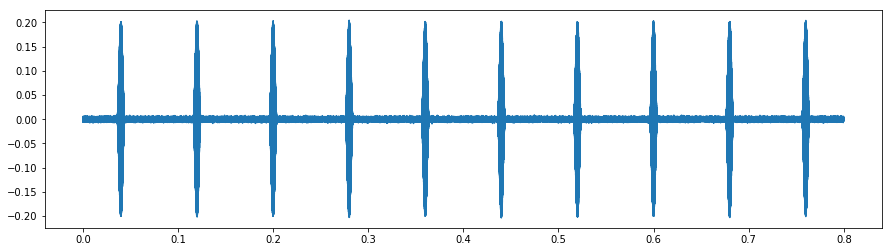

In [5]:
# Plot signal.
plt.plot(signal_util.get_array_in_sec(signal), signal)
plt.show()

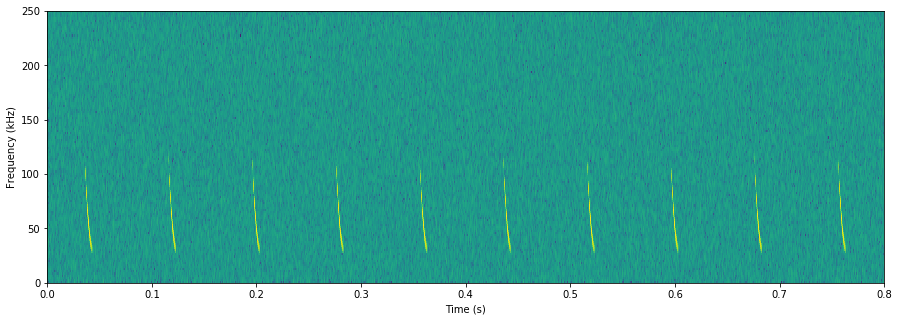

In [6]:
# Plot spectrogram.
window_size = 256
window_function = 'blackh'
jumps_per_ms = 8

# Create util.
dbsf_util = dsp4bats.DbfsSpectrumUtil(window_size=window_size, 
                                      window_function=window_function,
                                      sampling_freq=signal_util.sampling_freq)
# Create matrix.
jump = int(signal_util.sampling_freq/1000/jumps_per_ms)
size = int(len(signal) / jump)
matrix = dbsf_util.calc_dbfs_matrix(signal, matrix_size=size, jump=jump)

# Plot.
max_freq = signal_util.sampling_freq / 1000 / 2 # kHz and Nyquist.
f, ax = plt.subplots(figsize=(15, 5))
ax.imshow(matrix.T, 
          cmap='viridis', 
          origin='lower',
          extent=(0, len(signal) / signal_util.sampling_freq, 
                  0, max_freq)
         )
ax.axis('tight')
ax.set_ylabel('Frequency (kHz)')
ax.set_xlabel('Time (s)')
#ax.set_ylim([0,160])
#
plt.show()

In [7]:
# Write to file in Time Expanded mode.
wave_writer = dsp4bats.WaveFileWriter('chirp_120_to_30_khz_TE500.wav',
                                      sampling_freq=signal_util.sampling_freq,
                                      time_expanded=True)
wave_writer.write_buffer(signal)
wave_writer.close()

In [9]:
# Play sound.
IPython.display.Audio(signal, rate=int(signal_util.sampling_freq/10))